In [29]:
from __future__ import division

from sympy import *
init_printing(use_unicode=True)

In [30]:
Il, Ir, I0 = symbols("I_{l} I_{r} I0", complex=True)
Ml, Cl = symbols("M_{l} C_{l}", positive=True)
Mr, Cr = symbols("M_{r} C_{r}", positive=True)
R0, Rload, Rg, L0, С0 = symbols("R0 R_{load} R_{g} L0 С0", positive=True)
omega, omega0, omegal, omegar = symbols("\\omega \\omega_{0} \\omega_{l} \\omega_{r}", positive=True)
Csum0, Csuml, Csumr = symbols("C_{\\Sigma0} C_{{\\Sigma}l} C_{{\\Sigma}r}", positive=True)
Q0, Ql, Qr, Ll, Lr, Rl, Rr = symbols("Q0 Q_{l} Q_{r} L_{l} L_{r} R_{l} R_{r}", positive=True)
chig, chiload = symbols("\\chi_{g} \\chi_{load}", positive=True)
Kel, Ker, Khl, Khr = symbols("K^{e}_{l} K^{e}_{r} K^{h}_{l} K^{h}_{r}", positive=True)
f, f0, fl, fr = symbols("f f0 f_{l} f_{r}", positive=True)
Xl, Xr, X0 = symbols("X_{l} X_{r} X0", complex=True)
Xln, Xrn = symbols("X_{ln} X_{rn}", complex=True)
Pg, phi = symbols("P_{g} \\varphi", positive=True)
U, Up, Z0, Z0n = symbols("U U_P Z0 Z^{N}_{0}", real=True)

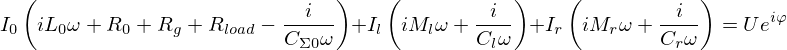

In [31]:
equation = Eq((I*omega*Ml - 1/(I*omega*Cl))*Il+(R0+Rload+Rg+I*omega*L0+1/(I*omega*Csum0))*I0+(I*omega*Mr - 1/(I*omega*Cr))*Ir, U*exp(I*phi))
equation

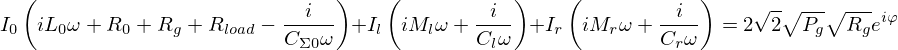

In [32]:
substitute = {U: 2*sqrt(2*Pg*Rg)}
equation = equation.subs(substitute)
equation

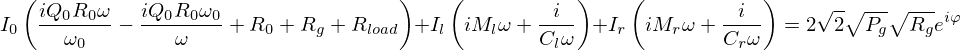

In [33]:
substitute = {L0: R0*Q0/omega0}
equation = equation.subs(substitute)
substitute = {Csum0: 1/(omega0*Q0*R0)}
equation = equation.subs(substitute)
equation

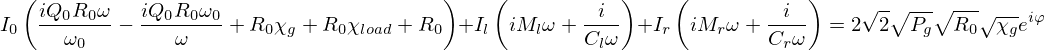

In [34]:
substitute = {Rg: R0*chig}
equation = equation.subs(substitute)
substitute = {Rload: R0*chiload}
equation = equation.subs(substitute)
equation

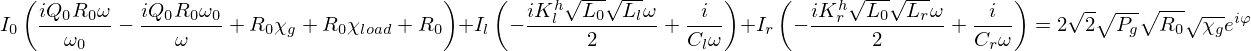

In [35]:
substitute = {Mr: -Khr*sqrt(L0)*sqrt(Lr)/2}
equation = equation.subs(substitute)
substitute = {Ml: -Khl*sqrt(L0)*sqrt(Ll)/2}
equation = equation.subs(substitute)
equation

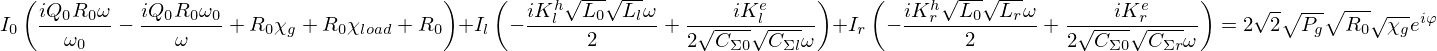

In [36]:
substitute = {Cr: 2*sqrt(Csum0)*sqrt(Csumr)/Ker}
equation = equation.subs(substitute)
substitute = {Cl: 2*sqrt(Csum0)*sqrt(Csuml)/Kel}
equation = equation.subs(substitute)
equation

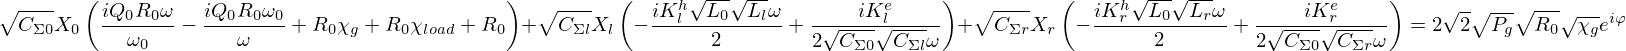

In [37]:
substitute = {Il: sqrt(Csuml)*Xl}
equation = equation.subs(substitute)
substitute = {Ir: Xr*sqrt(Csumr)}
equation = equation.subs(substitute)
substitute = {I0: X0*sqrt(Csum0)}
equation = equation.subs(substitute)
equation

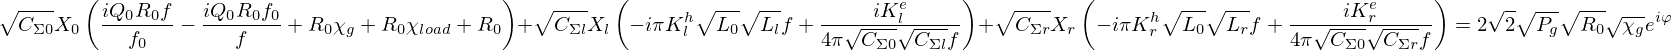

In [38]:
substitute = {omega: 2*pi*f}
equation = equation.subs(substitute)
substitute = {omegar: 2*pi*fr}
equation = equation.subs(substitute)
substitute = {omegal: 2*pi*fl}
equation = equation.subs(substitute)
substitute = {omega0: 2*pi*f0}
equation = equation.subs(substitute)
equation

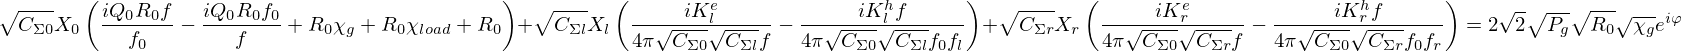

In [39]:
substitute = solve(Eq(1/(2*pi*sqrt(L0)*sqrt(Csum0)), f0), L0, dict=1)[0]
equation = equation.subs(substitute)
substitute = solve(Eq(1/(2*pi*sqrt(Ll)*sqrt(Csuml)), fl), Ll, dict=1)[0]
equation = equation.subs(substitute)
substitute = solve(Eq(1/(2*pi*sqrt(Lr)*sqrt(Csumr)), fr), Lr, dict=1)[0]
equation = equation.subs(substitute)
equation

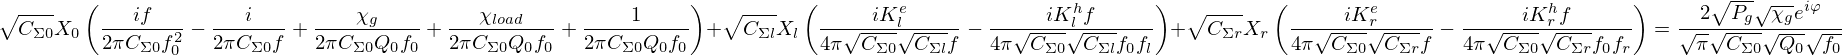

In [40]:
substitute = {R0: 1/(Q0*2*pi*f0*Csum0)}
equation = equation.subs(substitute)
equation

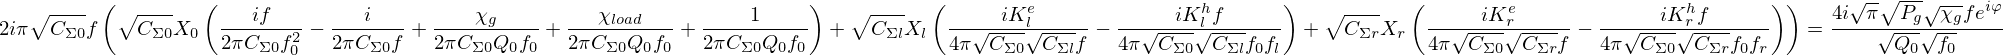

In [41]:
substitute = sqrt(Csum0)*2*pi*f*I
equation = Eq(equation.lhs*substitute, equation.rhs*substitute)
equation

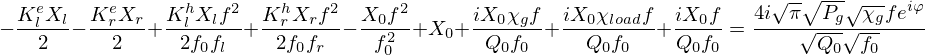

In [42]:
stationary = expand(Eq(equation.lhs, equation.rhs))
stationary

# Ввод мощности

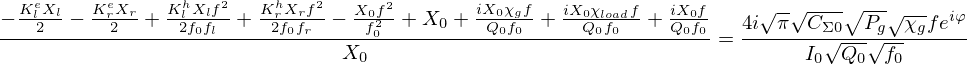

In [43]:
equation = Eq(stationary.lhs/X0, stationary.rhs*sqrt(Csum0)/I0)
equation

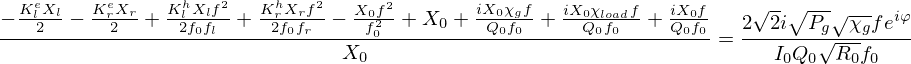

In [44]:
substitute = {Csum0: 1/(2*pi*f0*Q0*R0)}
equation = equation.subs(substitute)
equation

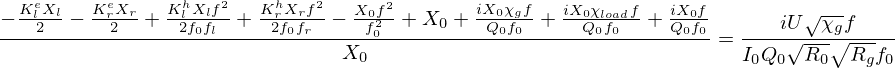

In [45]:
equation = Eq(equation.lhs, equation.rhs*U/(exp(I*phi)*sqrt(8*Rg*Pg)))
equation

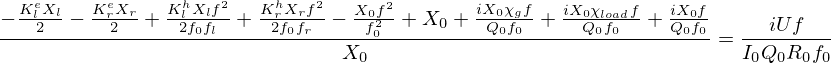

In [46]:
substitute = {chig: Rg/R0}
equation = Eq(equation.lhs, equation.rhs.subs(substitute))
equation

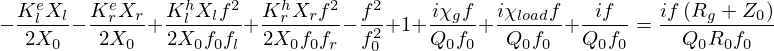

In [47]:
substitute = {U: I0*(Z0+Rg)}
equation = equation.subs(substitute)
equation = Eq(expand(equation.lhs), equation.rhs)
equation

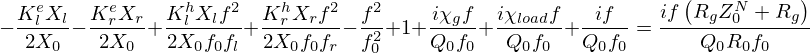

In [48]:
substitute = {Z0: Z0n*Rg}
equation = equation.subs(substitute)
equation

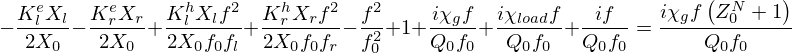

In [49]:
substitute = {Rg: R0*chig}
equation = equation.subs(substitute)
equation = Eq(equation.lhs, simplify(equation.rhs))
equation

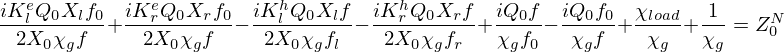

In [50]:
equation = Eq(equation.lhs-I*chig*f/(Q0*f0), equation.rhs-I*chig*f/(Q0*f0))
equation = expand(equation)
equation = Eq(equation.lhs/(I*chig*f/(Q0*f0)), equation.rhs/(I*chig*f/(Q0*f0)))
zin = expand(equation)
zin

# Оптимальная связь

$$Г=\frac{Z_{in}-1}{Z_{in}+1}=0$$
$$Z_{in}-1=0$$

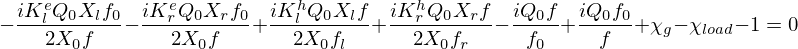

In [51]:
equation = expand(Eq(chig*(1-zin.lhs),0))
equation

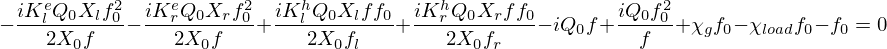

In [52]:
substitute = f0
equation = expand(Eq(equation.lhs * substitute,0))
equation

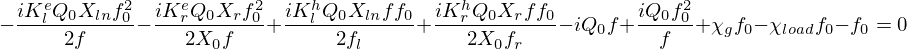

In [53]:
substitute = {Xl: Xln*X0}
equation = equation.subs(substitute)
equation

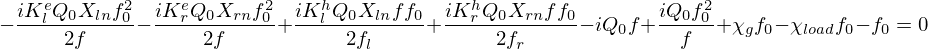

In [54]:
substitute = {Xr: Xrn*X0}
equation = equation.subs(substitute)
equation